In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"


In [7]:
# Charger les données depuis l'URL dans un DataFrame pandas
df = pd.read_csv(URL)

# Afficher les premières lignes du DataFrame pour vérifier les données
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [9]:
# Convertir la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extraire l'année et le mois et les ajouter comme nouvelles colonnes
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Afficher les premières lignes pour vérifier
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R,2005,1
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R,2005,1
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R,2005,1
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R,2005,1
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R,2005,1


In [10]:
df.dtypes

Region                                         object
Date                                   datetime64[ns]
Estimated_fire_area                           float64
Mean_estimated_fire_brightness                float64
Mean_estimated_fire_radiative_power           float64
Mean_confidence                               float64
Std_confidence                                float64
Var_confidence                                float64
Count                                           int64
Replaced                                       object
Year                                            int32
Month                                           int32
dtype: object

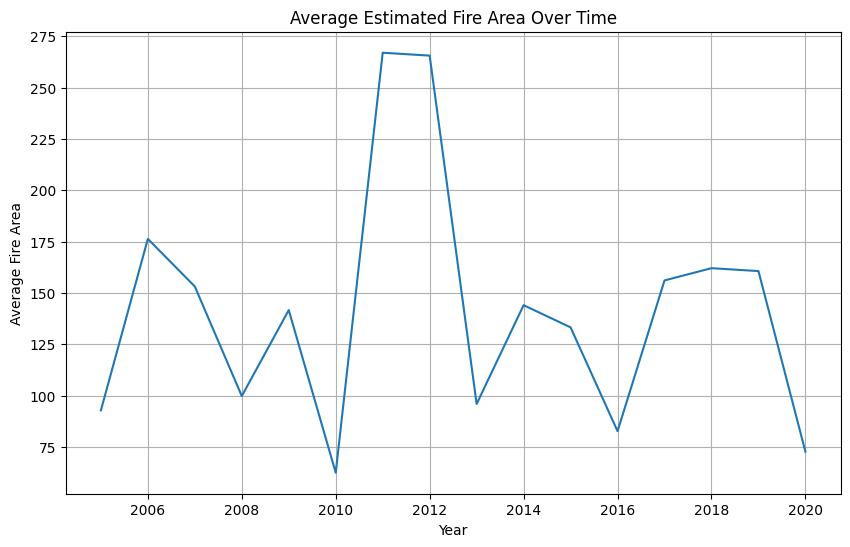

In [11]:
# Group by year and calculate the mean of the estimated fire area
avg_fire_area_by_year = df.groupby('Year')['Estimated_fire_area'].mean()

# Plot the trend
avg_fire_area_by_year.plot(kind='line', title='Average Estimated Fire Area Over Time', xlabel='Year', ylabel='Average Fire Area', figsize=(10, 6))
plt.grid()
plt.show()

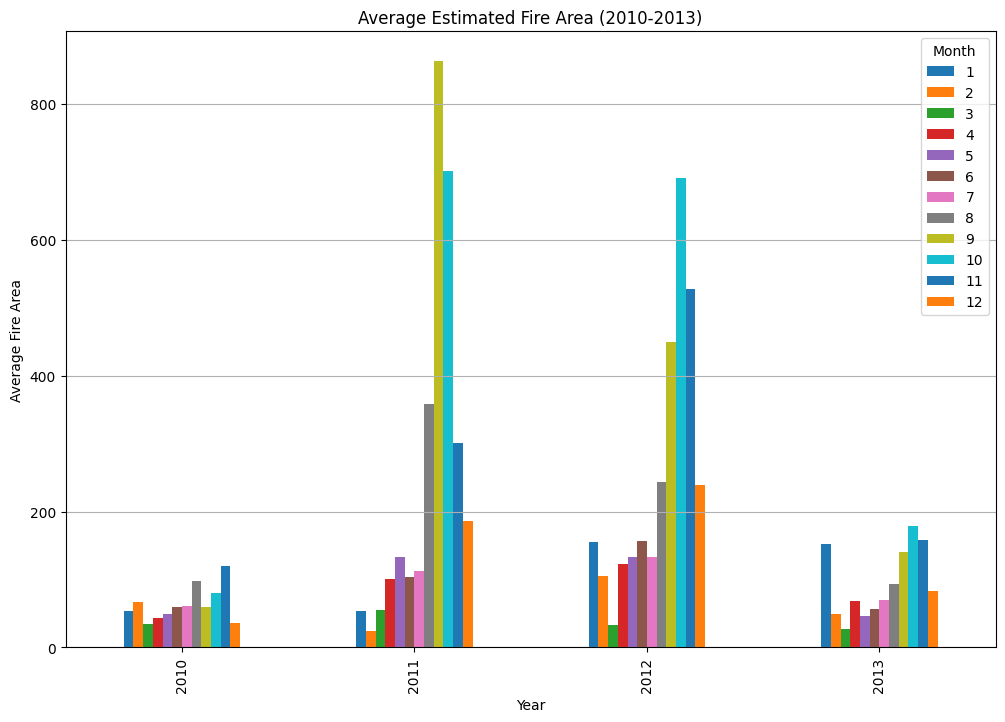

In [13]:
# Group by Year and Month, and calculate the mean of the estimated fire area
avg_fire_area_by_month = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean().unstack()

# Plot the data
avg_fire_area_by_month.loc[2010:2013].plot(kind='bar', figsize=(12, 8), title='Average Estimated Fire Area (2010-2013)', ylabel='Average Fire Area')
plt.grid(axis='y')
plt.show()

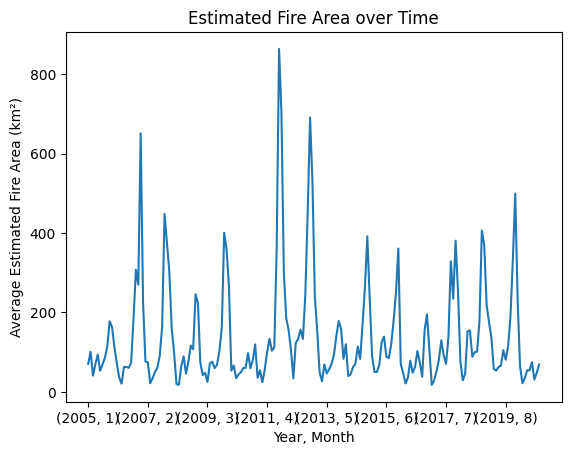

In [14]:
df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
    # Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

C:\Users\yohar\AppData\Local\Temp\ipykernel_53432\2867983377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_brightness_by_region, x='Region', y='Mean_estimated_fire_brightness', palette='viridis')


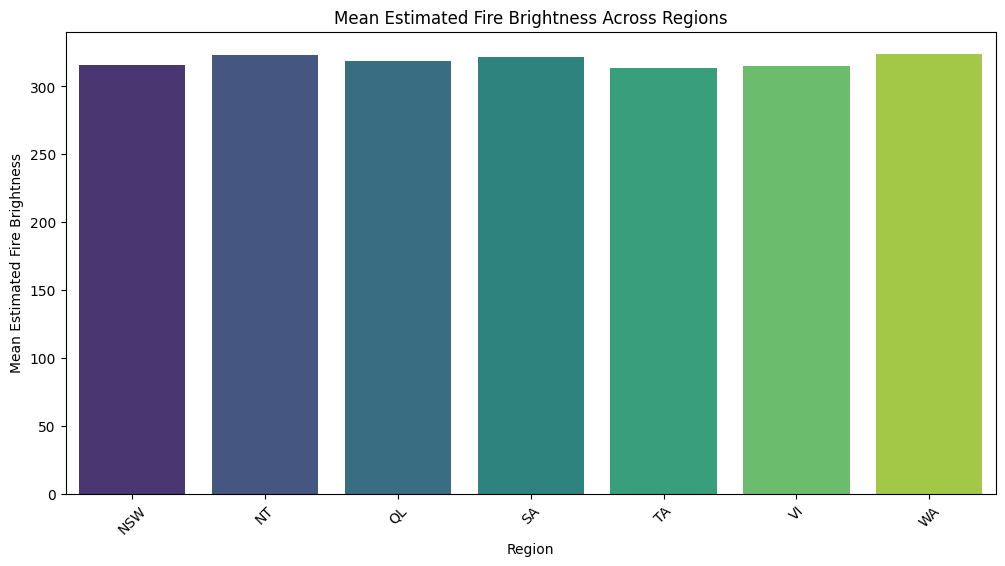

In [15]:
# Calculate the mean estimated fire brightness for each region
mean_brightness_by_region = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_brightness_by_region, x='Region', y='Mean_estimated_fire_brightness', palette='viridis')
plt.title('Mean Estimated Fire Brightness Across Regions')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness')
plt.xticks(rotation=45)
plt.show()

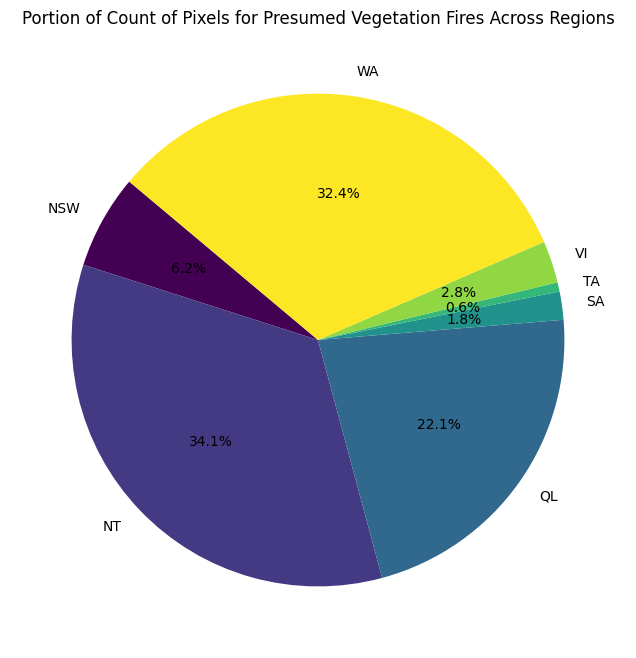

In [17]:
# Group by region and sum the 'Count' column
count_by_region = df.groupby('Region')['Count'].sum()

# Plot a pie chart
plt.figure(figsize=(10, 8))
count_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Portion of Count of Pixels for Presumed Vegetation Fires Across Regions')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

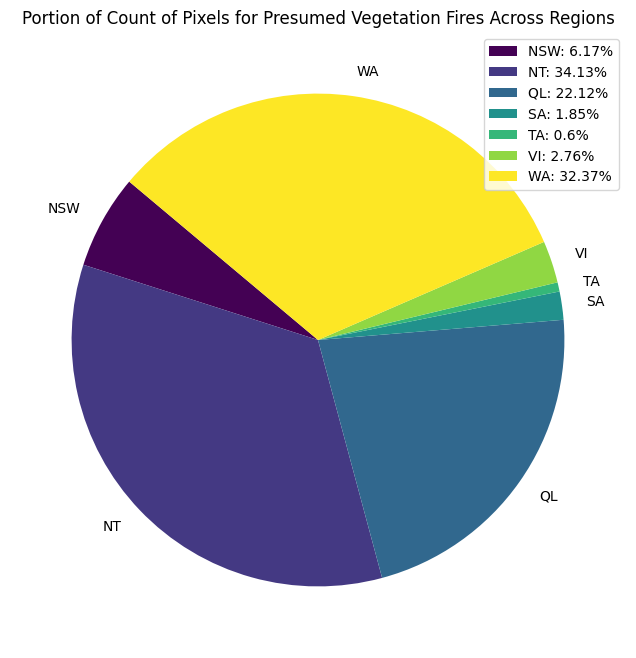

In [20]:
# Group by region and sum the 'Count' column
count_by_region = df.groupby('Region')['Count'].sum()

# Plot a pie chart
plt.figure(figsize=(10, 8))
count_by_region.plot(kind='pie', startangle=140, colormap='viridis')
plt.title('Portion of Count of Pixels for Presumed Vegetation Fires Across Regions')
plt.ylabel('')  # Remove the default y-axis label

# Add a legend with percentages
percentages = [(i, round(k / region_counts.sum() * 100, 2)) for i, k in zip(region_counts.index, region_counts)]
plt.legend([f"{region}: {percent}%" for region, percent in percentages], loc='best')

plt.show()

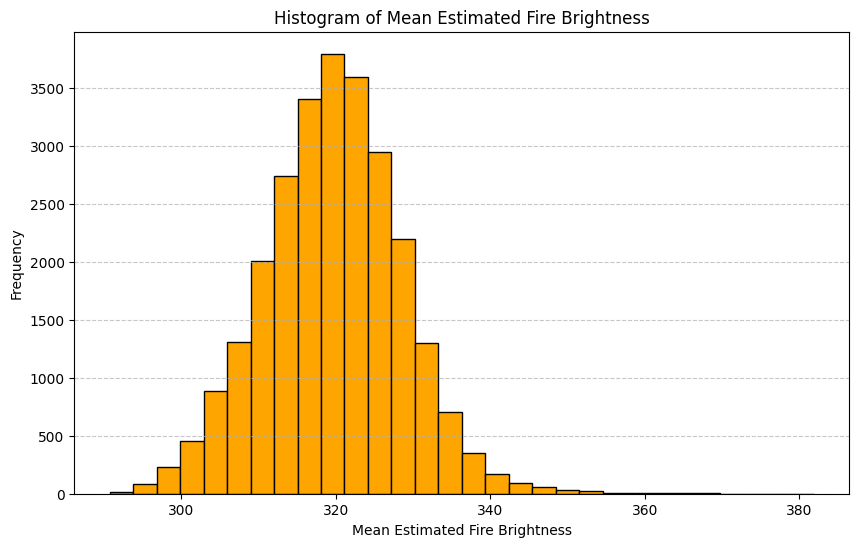

In [21]:
# Plot a histogram of the mean estimated fire brightness
plt.figure(figsize=(10, 6))
plt.hist(df['Mean_estimated_fire_brightness'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

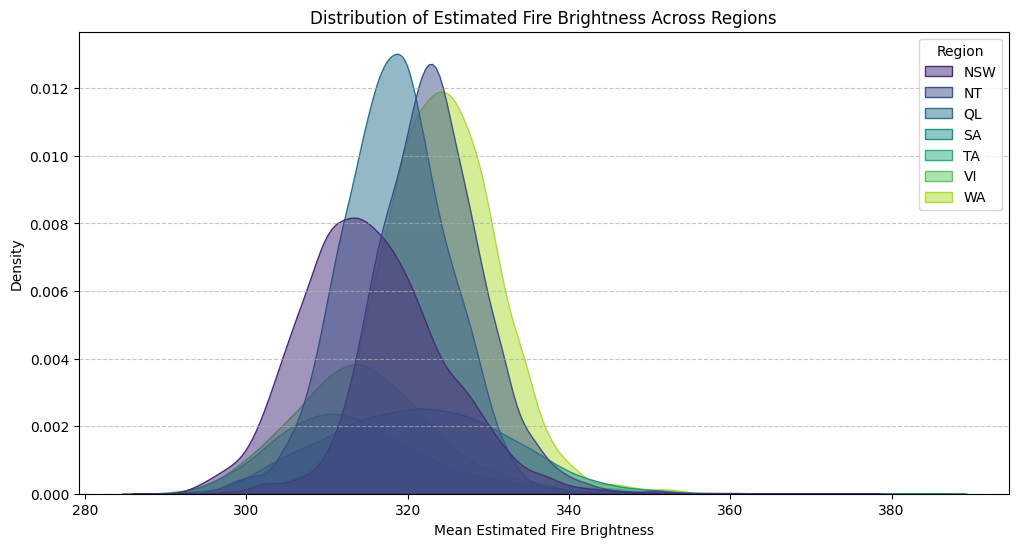

In [23]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', fill=True, palette='viridis', alpha=0.5)
plt.title('Distribution of Estimated Fire Brightness Across Regions')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

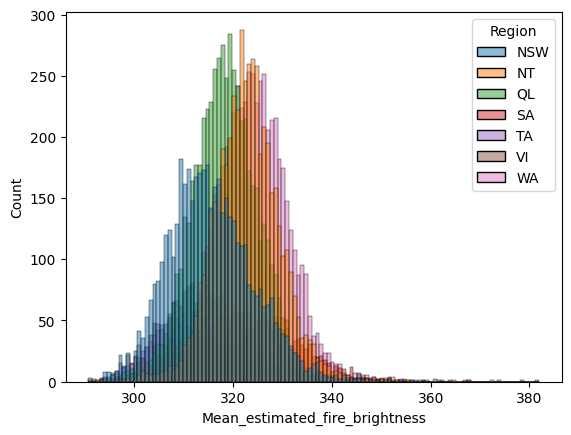

In [24]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

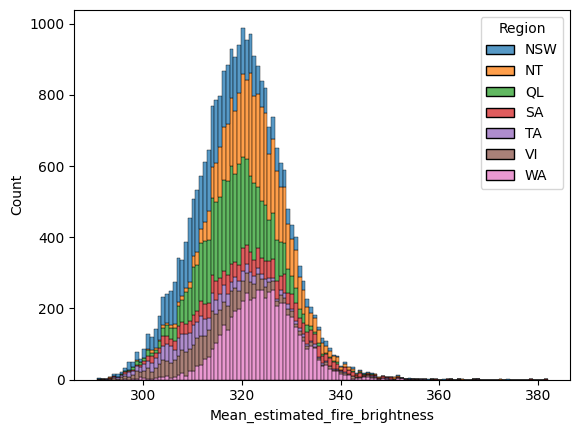

In [25]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

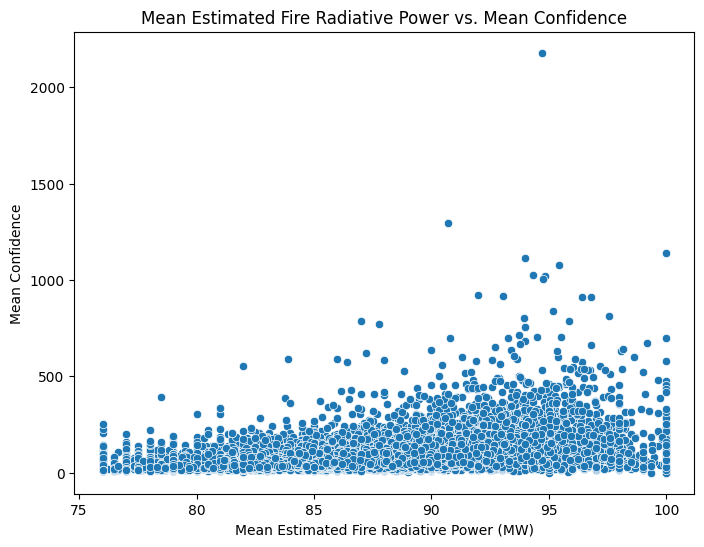

In [26]:
    # Creating a scatter plot to visualize the relationship between mean estimated fire radiative power and mean  confidence using Seaborn
plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [28]:
# Define coordinates for the regions (latitude, longitude)
region_coordinates = {
    'NSW': (-33.8688, 151.2093),  # New South Wales
    'NT': (-19.4914, 132.5500),   # Northern Territory
    'QL': (-20.9176, 142.7028),   # Queensland
    'SA': (-30.0002, 136.2092),   # South Australia
    'TA': (-41.4545, 145.9707),   # Tasmania
    'VI': (-37.8136, 144.9631),   # Victoria
    'WA': (-25.3444, 121.8315)    # Western Australia
}

# Create a Folium map centered on Australia
australia_map = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

# Add markers for each region
for region, coords in region_coordinates.items():
    folium.Marker(location=coords, popup=region).add_to(australia_map)

# Display the map
australia_map

In [29]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [30]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)

# Résumé du Projet : Analyse des Incendies Historiques

## Introduction
Ce projet vise à analyser les données historiques des incendies en Australie en utilisant des outils de visualisation et d'analyse de données. Les données proviennent de [ce lien](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv).

---

## Étapes Réalisées

### 1. Chargement et Préparation des Données
- Les données ont été chargées dans un DataFrame Pandas depuis l'URL fournie.
- Conversion de la colonne `Date` en type datetime.
- Extraction des colonnes `Year` et `Month` à partir de la colonne `Date`.

**Illustration :** Aperçu des premières lignes du DataFrame.

---

### 2. Analyse des Données
#### a. Types de Données
- Vérification des types de données pour s'assurer de leur cohérence.

#### b. Moyenne de la Surface des Incendies par Année
- Calcul de la moyenne de la surface estimée des incendies par année.
- Visualisation de la tendance annuelle.

**Illustration :** Graphique en ligne montrant la moyenne des surfaces estimées par année.

#### c. Moyenne de la Surface des Incendies par Mois
- Calcul de la moyenne de la surface estimée des incendies par mois et par année.
- Visualisation des données pour les années 2010 à 2013.

**Illustration :** Graphique en barres empilées pour les années 2010-2013.

---

### 3. Analyse Régionale
#### a. Moyenne de la Luminosité des Incendies par Région
- Calcul de la luminosité moyenne estimée des incendies pour chaque région.
- Visualisation avec un graphique en barres.

**Illustration :** Graphique en barres montrant la luminosité moyenne par région.

#### b. Répartition des Pixels d'Incendies par Région
- Calcul de la somme des pixels d'incendies pour chaque région.
- Visualisation avec un diagramme circulaire.

**Illustration :** Diagramme circulaire montrant la répartition des pixels d'incendies.

---

### 4. Distribution et Corrélations
#### a. Histogramme de la Luminosité Moyenne
- Visualisation de la distribution de la luminosité moyenne estimée des incendies.

**Illustration :** Histogramme de la luminosité moyenne.

#### b. Distribution par Région
- Visualisation de la distribution de la luminosité moyenne par région à l'aide de KDE et d'histogrammes empilés.

**Illustration :** Graphiques KDE et histogrammes empilés.

#### c. Corrélation entre Puissance Radiative et Confiance
- Création d'un nuage de points pour visualiser la relation entre la puissance radiative moyenne et la confiance moyenne.

**Illustration :** Nuage de points montrant la corrélation.

---

### 5. Cartographie
#### a. Carte des Régions
- Création d'une carte interactive avec Folium pour localiser les régions australiennes.

**Illustration :** Carte interactive des régions.

#### b. Visualisation des Incendies par Région
- Ajout de marqueurs circulaires pour représenter les incendies sur une carte.

**Illustration :** Carte avec marqueurs circulaires.

---

## Conclusion
Ce projet a permis d'explorer les données historiques des incendies en Australie, de visualiser les tendances et de mieux comprendre les dynamiques régionales et temporelles des incendies. Les visualisations interactives et les analyses statistiques offrent des perspectives utiles pour la gestion des incendies et la prise de décision.